In [1]:
import pandas as pd
import numpy as np
import os

import math

import src.visualization.simple_visualization as sv
import src.features.feature_engineering_1 as feng

In [3]:
# Récupération des données
years = ['2016', '2017', '2018', '2019', '2020']

df = feng.get_all_season_data(years)
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,-77.0,5.0,NaN,NaN,Ottawa Senators
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Ottawa Senators
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Ottawa Senators
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Ottawa Senators
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,-34.0,28.0,NaN,NaN,Ottawa Senators


$$ \textbf{Ajout des caractéristiques :} $$

$$ \underline{\textbf{QUESTION 1 :}} $$

In [4]:
df = feng.add_new_features(df)
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team,distance_to_net,shot_angle,is_goal,is_empty_net
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,-77.0,5.0,NaN,NaN,Ottawa Senators,13.0,23.0,0,0
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Ottawa Senators,13.0,77.0,0,0
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Ottawa Senators,76.0,30.0,0,0
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Ottawa Senators,58.0,15.0,0,0
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,-34.0,28.0,NaN,NaN,Ottawa Senators,62.0,27.0,0,0


$$ \textbf{Histogrammes} $$ 

$$ \text{Pour la distance de tir :} $$

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")

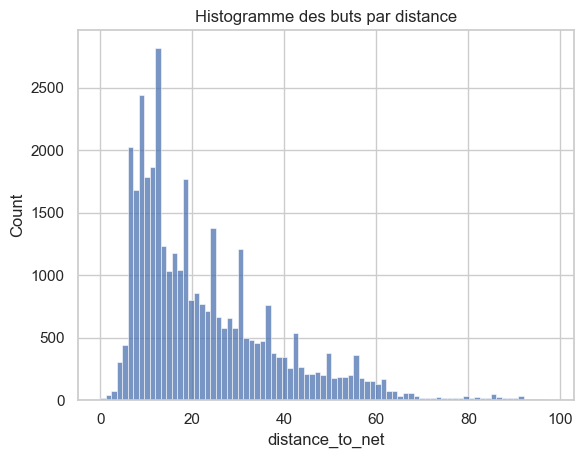

In [6]:
# Histogramme pour les buts
sns.histplot(df[df['is_goal'] == 1], x = 'distance_to_net')
plt.title('Histogramme des buts par distance')
plt.show()

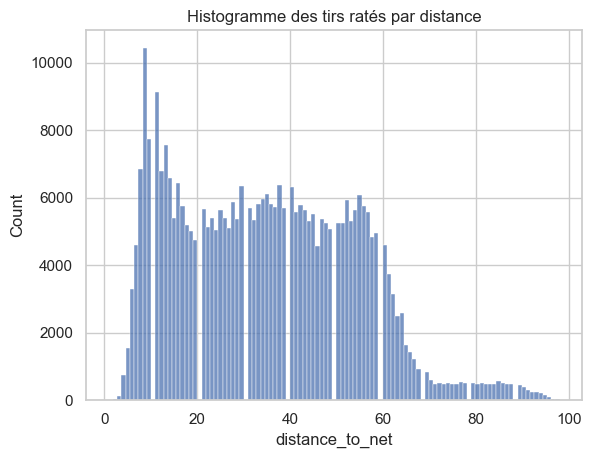

In [7]:
sns.histplot(df[df['is_goal'] == 0], x ='distance_to_net')
plt.title('Histogramme des tirs ratés par distance')
plt.show()

$$\text{Pour l'angle de tir :}$$

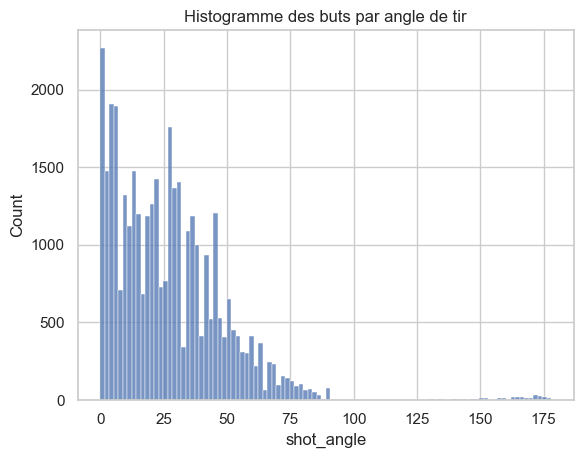

In [8]:
# Histogramme pour les buts
sns.histplot(df[df['is_goal'] == 1], x = 'shot_angle', bins = 100)
plt.title('Histogramme des buts par angle de tir')
plt.show()

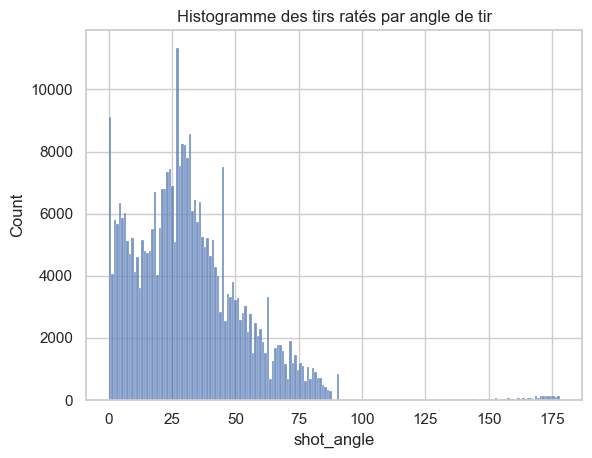

In [9]:
# Histogramme pour les tirs ratés
sns.histplot(df[df['is_goal'] == 0], x = 'shot_angle', bins = 180)
plt.title('Histogramme des tirs ratés par angle de tir')
plt.show()

$$ \text{Histogramme avec la distance et l'angle de tir} $$

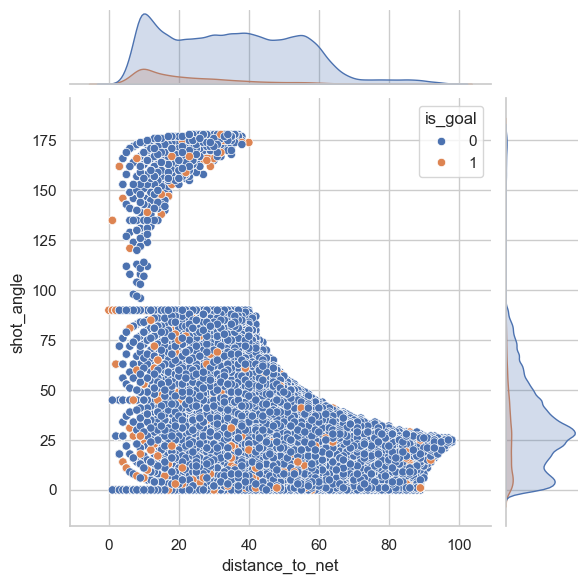

In [10]:
sns.jointplot(data = df, x = 'distance_to_net', y = 'shot_angle', hue ='is_goal')

$$ \underline{\textbf{QUESTION 2 :}} $$

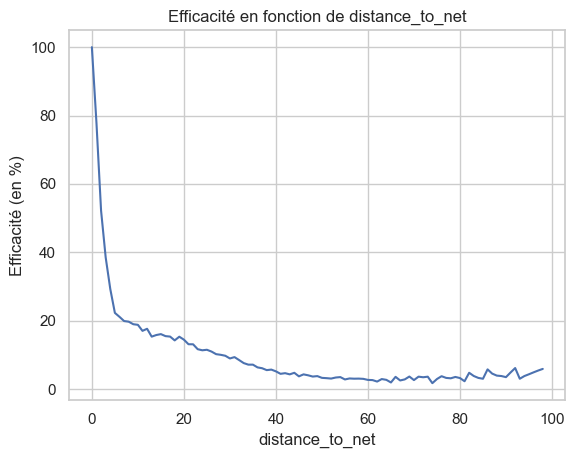

In [11]:
feng.plot_efficiency_curve(df, 'distance_to_net')

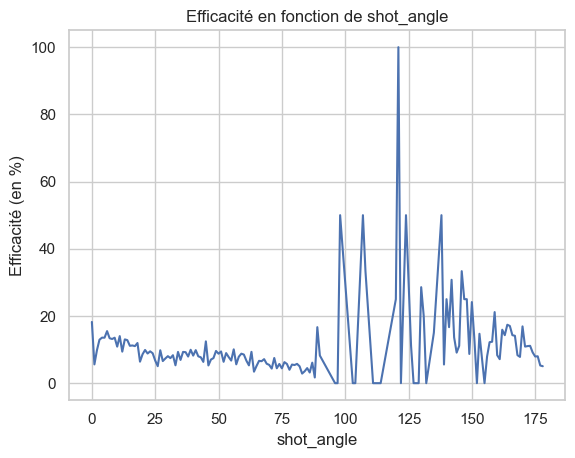

In [12]:
feng.plot_efficiency_curve(df, 'shot_angle')

$$ \underline{\textbf{QUESTION 3 :}} $$ 

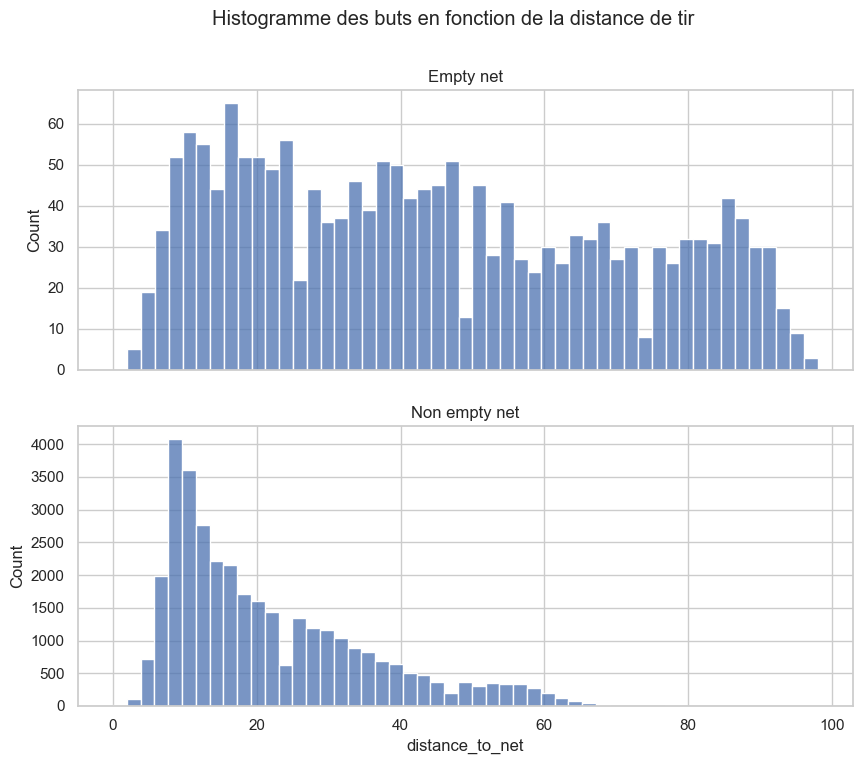

In [13]:
feng.hist_for_goals(df)